In [1]:
import matplotlib.pyplot as plt
import arviz as az
from pystan import StanModel
import numpy as np
import pandas as pd
import seaborn as sns

## Problem 17.1: A meta-analysis of beta blocker trials

In [3]:
df = pd.read_csv("../all_data/hierarchical_betaBlocker.csv")
df.head()

,Unnamed: 0,rt,nt,rc,nc,N
0,1,3,38,3,39,22
1,2,7,114,14,116,22
2,3,5,69,11,93,22
3,4,102,1533,127,1520,22
4,5,28,355,27,365,22


In [3]:
 model_code = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(0,10);
      mu ~ normal(0,10);
    }
"""

In [4]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_11ad4a3f04194edb4c3a6297afa2f057 NOW.


In [26]:
fit = sm.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
)

summary_dict = fit.summary()
# df = pd.DataFrame(summary_dict['summary'], 
#                   columns=summary_dict['summary_colnames'], 
#                   index=summary_dict['summary_rownames'])

In [27]:
fit

Inference for Stan model: anon_model_11ad4a3f04194edb4c3a6297afa2f057.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[1]      -2.64    0.01   0.64   -4.0  -3.02  -2.59  -2.22  -1.52   2321    1.0
mu[2]      -2.02  5.5e-3   0.28  -2.59   -2.2  -2.01  -1.82  -1.49   2681    1.0
mu[3]      -2.05  6.7e-3   0.31  -2.69  -2.26  -2.03  -1.83  -1.48   2188    1.0
mu[4]       -2.4  1.8e-3   0.09  -2.59  -2.46   -2.4  -2.34  -2.22   2587    1.0
mu[5]      -2.54  3.6e-3   0.19  -2.93  -2.67  -2.54  -2.41  -2.17   2834    1.0
mu[6]      -2.11  8.1e-3   0.44  -3.04  -2.39  -2.09  -1.81   -1.3   2934    1.0
mu[7]      -1.65  1.8e-3   0.09  -1.82   -1.7  -1.64  -1.58  -1.48   2315    1.0
mu[8]      -2.18  3.1e-3   0.15  -2.48  -2.28  -2.18  -2.08   -1.9   2335    1.0
mu[9]      -1.91  3.6e-3   0.18  -2.27  -2.03   -1.9  -1.78  -1.56   2424    1.0
mu[

In [7]:
 model_code_hier = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
"""

In [8]:
sm_hier = StanModel(model_code=model_code_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_26ea2282677df1350e0f56efeed5a09b NOW.


In [21]:
fit_hier = sm_hier.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
#     seed=1,
    control=dict(adapt_delta=0.99)
)

summary_dict_hier = fit_hier.summary()
# df = pd.DataFrame(summary_dict_hier['summary'], 
#                   columns=summary_dict_hier['summary_colnames'], 
#                   index=summary_dict_hier['summary_rownames'])

In [22]:
fit_hier

Inference for Stan model: anon_model_26ea2282677df1350e0f56efeed5a09b.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d          -0.25  2.5e-3   0.07  -0.39  -0.29  -0.25  -0.21  -0.11    772    1.0
sigma       0.16  6.0e-3   0.08   0.04    0.1   0.15    0.2   0.34    173   1.02
mu[1]      -2.43  8.9e-3   0.44  -3.37  -2.72   -2.4  -2.13  -1.64   2468    1.0
mu[2]      -2.18  5.3e-3   0.25  -2.68  -2.34  -2.18  -2.01  -1.72   2183    1.0
mu[3]      -2.13  5.3e-3   0.28  -2.68  -2.33  -2.12  -1.94  -1.62   2751    1.0
mu[4]       -2.4  1.8e-3   0.08  -2.57  -2.45   -2.4  -2.34  -2.25   2138    1.0
mu[5]      -2.42  3.6e-3   0.16  -2.74  -2.52  -2.42  -2.31  -2.12   1866    1.0
mu[6]      -2.22  7.1e-3   0.35  -2.92  -2.46  -2.21  -1.98   -1.6   2443    1.0
mu[7]       -1.7  2.2e-3   0.08  -1.86  -1.76   -1.7  -1.64  -1.53   1500    1.0
mu[

In [28]:
df_normal = pd.DataFrame(fit.extract("delta")["delta"])
df_hier = pd.DataFrame(fit_hier.extract("delta")["delta"])

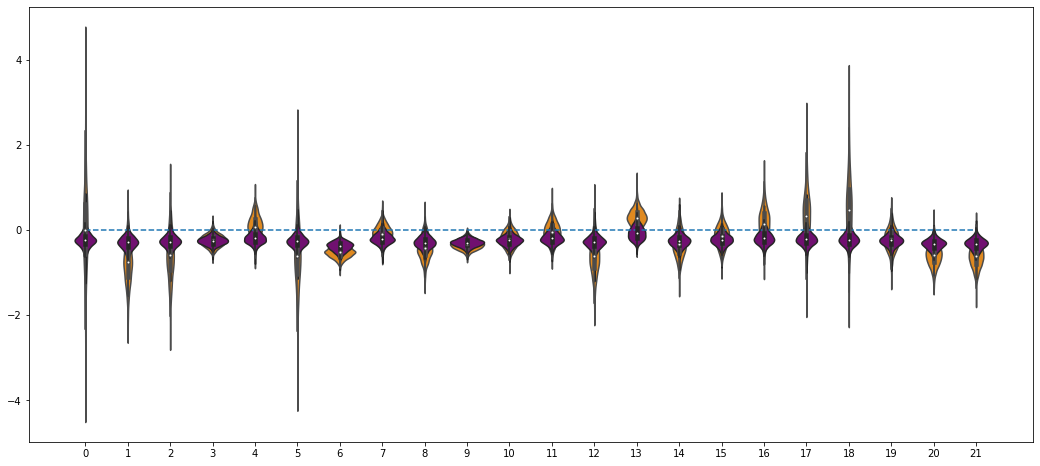

In [30]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_normal,color="darkorange")
sns.violinplot(data=df_hier,color="purple")
plt.hlines(0,0,21,linestyles="--")

In [4]:
 model_code_hier = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      vector[N] mu;
      vector[N] delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
    generated quantities {
      real delta_overall;
      delta_overall = normal_rng(d,sigma);
    }
"""

In [5]:
sm_hier = StanModel(model_code=model_code_hier)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d61ac3c3534f473ff64dab0b1cddef00 NOW.


In [27]:
fit_hier = sm_hier.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
    control=dict(adapt_delta=0.99)
)


In [28]:
fit_hier

Inference for Stan model: anon_model_d61ac3c3534f473ff64dab0b1cddef00.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d              -0.25  3.1e-3   0.07  -0.38  -0.29  -0.25   -0.2   -0.1    514    1.0
sigma           0.15  5.8e-3   0.08   0.03   0.09   0.14    0.2   0.32    169   1.01
mu[1]          -2.44  8.4e-3   0.44  -3.38  -2.72  -2.41  -2.13  -1.66   2713    1.0
mu[2]          -2.18  5.6e-3   0.24  -2.68  -2.33  -2.17  -2.01  -1.71   1829    1.0
mu[3]          -2.13  5.7e-3   0.26  -2.68   -2.3  -2.12  -1.95  -1.65   2122    1.0
mu[4]           -2.4  1.8e-3   0.08  -2.56  -2.45   -2.4  -2.34  -2.25   2020    1.0
mu[5]          -2.42  3.8e-3   0.16  -2.73  -2.52  -2.41  -2.31  -2.12   1742    1.0
mu[6]          -2.22  7.5e-3   0.35  -2.95  -2.46  -2.21  -1.97  -1.57   2208    1.0
mu[7]           -1.7  2.8e-3   0.08  -1.86  -1.7

array([<AxesSubplot:title={'center':'delta_overall'}>], dtype=object)

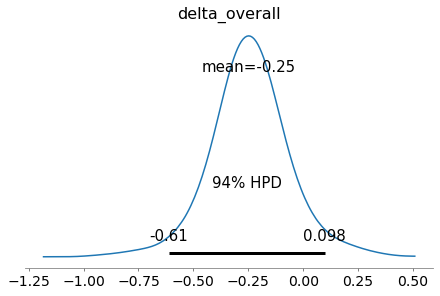

In [29]:
az.plot_posterior(fit_hier,var_names=["delta_overall"])

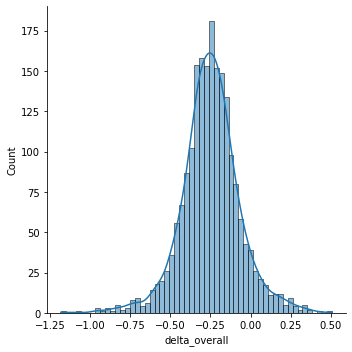

In [35]:
sns.displot(fit_hier.to_dataframe()["delta_overall"],kde=True)

<AxesSubplot:>

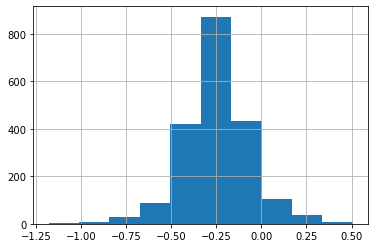

In [33]:
fit_hier.to_dataframe()["delta_overall"].hist(bins=10)

In [41]:
model_code_constant = """
    data {
      int<lower=0> N;
      int<lower=0> nt[N];
      int<lower=0> rt[N];
      int<lower=0> nc[N];
      int<lower=0> rc[N];
    }
    parameters {
      real d;
      real<lower=0> sigma;
      real mu;
      real delta;
    }
    model {
      rt ~ binomial_logit(nt, mu + delta);
      rc ~ binomial_logit(nc, mu);
      delta ~ normal(d,sigma);
      mu ~ normal(0,10);
      d ~ normal(0,10);
      sigma ~ cauchy(0,2.5);
    }
    generated quantities {
      real delta_overall;
      delta_overall = normal_rng(d,sigma);
    }
"""

In [42]:
sm_constant = StanModel(model_code=model_code_constant)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_58510cb7c1492e77c71f92c9304b128c NOW.


In [103]:
fit_constant = sm_constant.sampling(
    data=dict(N=len(df["N"]),rt=df["rt"],nt=df["nt"],rc=df["rc"],nc=df["nc"]),
    warmup=500,
    iter=1000,
    chains=4,
    control=dict(adapt_delta=0.999)
)

In [104]:
fit_constant

Inference for Stan model: anon_model_58510cb7c1492e77c71f92c9304b128c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
d              -0.41    0.14   2.97  -7.72  -1.34  -0.27   0.77   5.73    432   1.01
sigma           3.39    0.21   5.48   0.14    0.9   1.98   3.87  15.71    676    1.0
mu              -2.2  1.2e-3   0.03  -2.26  -2.22   -2.2  -2.18  -2.13    767    1.0
delta          -0.26  1.9e-3   0.05  -0.35  -0.29  -0.26  -0.22  -0.15    664    1.0
delta_overall  -0.43    0.19   6.89 -12.47  -1.85  -0.26   1.33  10.61   1332    1.0
lp__           -6092    0.07   1.52  -6096  -6092  -6091  -6091  -6090    442    1.0

Samples were drawn using NUTS at Sun Jan  3 18:14:08 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat

<AxesSubplot:>

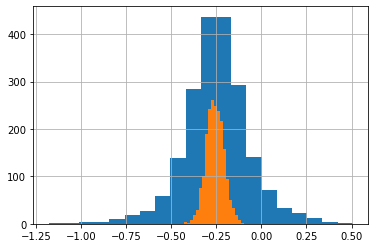

In [105]:
fit_hier.to_dataframe()["delta_overall"].hist(bins=20)
fit_constant.to_dataframe()["delta"].hist(bins=20)

## 17.2 I can't get no sleep

In [3]:
df = pd.read_csv("../all_data/evaluation_sleepstudy.csv")
df.head()

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308


In [4]:
 model_code = """
    data {
      int N;
      real r[N];
      int days[N];
    }
    parameters {
      real alpha;
      real beta;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha + beta * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ gamma(1,1);
    }
"""

In [5]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aaeee0a6f6ec50be36ff31db311e3026 NOW.


In [6]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"]),
    warmup=500,
    iter=1000,
    chains=4,
)

In [7]:
fit

Inference for Stan model: anon_model_aaeee0a6f6ec50be36ff31db311e3026.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 251.18    0.25   6.79 237.63 246.83 251.19 255.69 264.19    759    1.0
beta   10.48    0.04   1.27   8.06   9.64  10.46  11.29  13.05    937    1.0
sigma  48.07    0.07   2.51   43.5  46.35   48.0  49.62  53.28   1179    1.0
lp__  -782.8    0.05    1.3 -786.2 -783.4 -782.5 -781.9 -781.4    687    1.0

Samples were drawn using NUTS at Sat Jan  9 15:22:41 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

/home/jaf/.conda/envs/pystan-env/lib/python3.8/site-packages/arviz/plots/kdeplot.py:372: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)


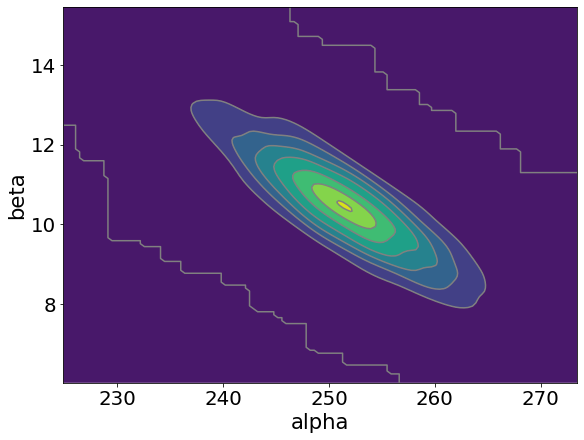

In [8]:
ax = az.plot_pair(
    fit,
    var_names=["alpha", "beta"],
    kind="kde",
    figsize=(8, 6),
)

strong negative correlation

In [9]:
 model_code = """
    data {
      int N;
      real r[N];
      int days[N];
    }
    parameters {
      real alpha;
      real beta;
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha + beta * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ gamma(1,1);
    }
    generated quantities {
        vector[N] lSimData;
        
        //generate posterior predictive samples  
        for (t in 1:N) {
            lSimData[t] = normal_rng(alpha + beta * days[t], sigma);
        }
  
    }
"""

In [10]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2710718486620d6d77d318bd424d9d9f NOW.


In [11]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"]),
    warmup=500,
    iter=1000,
    chains=4,
)

In [12]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_2710718486620d6d77d318bd424d9d9f.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha         251.6    0.23   6.81  237.9  247.1 251.55 256.01 265.23    867    1.0
beta          10.44    0.04   1.24   7.99   9.63  10.45  11.29  12.92    908    1.0
sigma         47.98    0.07   2.51  43.36  46.32   47.9  49.58  53.13   1261    1.0
lSimData[1]  251.85    1.08  46.98 161.41 220.86 250.93 284.03  346.2   1902    1.0
lSimData[2]  262.16    1.11  49.22 162.94 229.76 262.25 295.27 360.23   1950    1.0
lSimData[3]  271.02     1.1  49.06 173.55  237.7  270.7 304.71 367.57   1988    1.0
lSimData[4]   282.2    1.13  48.75 183.11 250.33 282.82 313.68 378.98   1870    1.0
lSimData[5]  292.88    1.11  47.53 199.03 261.82 291.86 325.55 386.83   1838    1.0
lSimData[6]   304

In [13]:
df_predictive = pd.DataFrame(fit.extract("lSimData")["lSimData"])

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

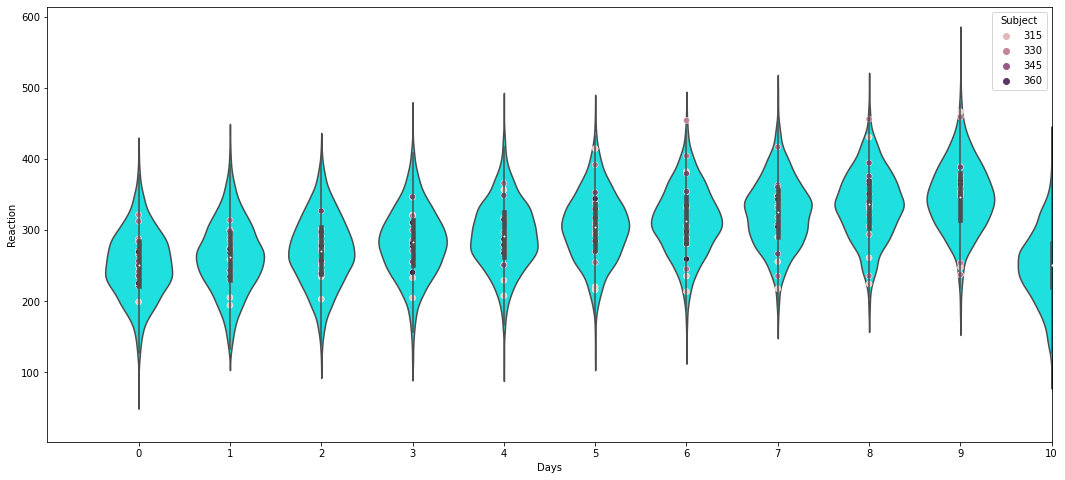

In [14]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive,color="cyan")
plt.xlim([-1,10]);
sns.scatterplot(x="Days",y="Reaction",data=df,hue="Subject")

In [15]:
 model_code = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
    }
    parameters {
      real alpha[18];
      real beta[18];
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      //sigma ~ normal(0,50);
    }
"""

In [16]:
def redo_subject_id(subject):
    count = 1
    ids = []
    for i,sub in enumerate(subject):
        if subject.iloc[i-1] != sub:
            count = count+1
        ids.append(count-1)
    
    return ids

In [17]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_a3c8b83334f320b073ffa695a23de371 NOW.


In [18]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"],subject=redo_subject_id(df["Subject"])),
    warmup=500,
    iter=1000,
    chains=4,
)

In [19]:
fit

Inference for Stan model: anon_model_a3c8b83334f320b073ffa695a23de371.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]  243.47     0.3  14.42 215.34 233.86 243.38 253.05 272.21   2279    1.0
alpha[2]  204.59     0.3  14.86 173.93 194.81 204.94 214.86 232.22   2448    1.0
alpha[3]  202.96    0.29  15.11 172.42 193.11 203.24 213.15 232.08   2725    1.0
alpha[4]  288.82    0.29  14.95 258.97  278.8 288.75  299.1 318.39   2712    1.0
alpha[5]  285.05    0.27  15.15 254.78 274.89 285.17  294.8  313.6   3242    1.0
alpha[6]  262.96    0.27  15.19 233.39  252.6 262.57 273.57 292.36   3170    1.0
alpha[7]  274.18     0.3  15.51 242.67 264.03 273.62 284.37 305.69   2657    1.0
alpha[8]  238.91    0.28  15.72 207.12 229.19 238.68 249.31 269.94   3225    1.0
alpha[9]  262.27     0.3  15.02  233.0 251.96 262.41 272.91 290.86   2591    1.0
alp

In [20]:
posterior_means = np.mean(fit.extract("beta")["beta"],0)
print(f"Heterogeous posterior Beta means ranging from {posterior_means.min()} to {posterior_means.max()}.")
print(f"with a mean of {posterior_means.mean()} compared to homogeneous mean of 10.5.")

Heterogeous posterior Beta means ranging from -2.7710223388202926 to 21.881730099117142.
with a mean of 10.61491821247635 compared to homogeneous mean of 10.5.


In [21]:
 model_code = """
    data {
      int N;
      vector[N] r;
      vector[N] days;
      int subject[N];
    }
    parameters {
      real alpha[18];
      real beta[18];
      real<lower=0> sigma;
      
    }
    model {
        for (t in 1:N)
              r[t] ~ normal(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
              
      alpha ~ normal(0,250);
      beta ~ normal(0,250);
      sigma ~ normal(0,50);
    }
    generated quantities {
        vector[N] r_simulated;
        
        //generate posterior predictive samples  
        for (t in 1:N) {
            r_simulated[t] = normal_rng(alpha[subject[t]] + beta[subject[t]] * days[t], sigma);
        }
  
    }    
"""

In [22]:
sm = StanModel(model_code=model_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5d91e1c53b8469ef1b325bd81a1f5826 NOW.


In [23]:
fit = sm.sampling(
    data=dict(N=len(df["Reaction"]),r=df["Reaction"],days=df["Days"],subject=redo_subject_id(df["Subject"])),
    warmup=500,
    iter=1000,
    chains=4,
)

In [24]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_5d91e1c53b8469ef1b325bd81a1f5826.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                  mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha[1]        243.66    0.28  15.47 214.54 232.87 243.29  254.1 273.58   3045    1.0
alpha[2]        204.14    0.26  15.25  173.5 194.27 203.88  214.4 234.61   3386    1.0
alpha[3]        203.23    0.29   15.2 173.16 193.01 203.07 213.74 231.47   2657    1.0
alpha[4]        288.46     0.3  15.21 257.78 278.32 288.54 298.68 318.37   2656    1.0
alpha[5]        284.37    0.29  14.91  254.6 274.46 284.25 294.41 314.44   2596    1.0
alpha[6]        263.14    0.31  15.27 232.92 252.64 262.96 273.87 292.75   2488    1.0
alpha[7]        274.11    0.29  14.77 243.51 264.24 274.05 284.09 303.45   2510    1.0
alpha[8]        239.65    0.28  15.15 210.17 229.81 239.63  249.5  268.6   28

In [25]:
df_predictive2 = pd.DataFrame(fit.extract("r_simulated")["r_simulated"])
df_predictive2

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,221.348404,246.301137,281.504843,298.783743,283.778550,382.501627,410.412267,396.121811,401.675644,433.253666,...,221.776961,350.640104,300.081095,348.150427,335.105656,284.163669,294.178477,330.588328,352.735628,404.406192
1,258.413680,240.297298,304.227009,349.003675,327.485109,352.642160,382.214687,390.655123,408.396323,479.647867,...,308.849173,290.834335,283.358114,308.442525,346.755540,358.485231,337.776151,395.098415,383.978622,364.491669
2,288.567813,256.737795,300.528556,328.903950,340.805312,375.411487,414.562217,431.459041,457.899931,422.490487,...,246.969470,274.676314,274.673515,280.440062,308.666542,335.467031,317.563494,391.969518,423.688073,337.736295
3,283.890856,290.221804,339.141279,319.872522,347.887489,325.377463,401.172961,448.499497,404.135901,445.199017,...,285.826674,283.194911,303.495250,266.478216,291.909526,330.067630,328.892419,361.711721,394.735688,331.903072
4,263.986215,271.940488,263.067760,329.152787,330.610855,323.242036,330.916941,373.492527,418.927589,409.680107,...,275.627521,268.407672,320.399632,313.166710,340.266630,298.698256,309.687106,353.887685,372.401295,372.752384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,226.282660,253.822385,302.800552,306.443016,321.355212,372.447521,330.360340,395.556175,424.903408,434.575407,...,234.476874,223.828558,248.590367,294.218564,286.095296,304.949879,312.195957,319.178045,357.044903,392.085772
1996,258.281744,260.868769,290.180107,317.932840,325.935245,332.021826,367.773730,398.089962,473.800588,455.697782,...,287.853581,316.327720,309.739981,304.469533,288.880770,297.999546,354.532710,359.848144,356.404632,401.033310
1997,197.016113,304.126457,295.384225,323.884761,326.597302,360.875468,380.889861,419.809150,406.835478,429.910705,...,211.340150,283.066146,271.101018,307.310605,285.748822,362.601865,369.162297,349.632497,359.411363,363.359441
1998,254.100471,286.131351,298.205133,342.985942,331.850058,324.558203,388.316479,350.785937,427.536324,456.429333,...,268.220247,284.554748,298.103725,255.374572,355.045016,354.242462,318.824477,338.524440,386.358121,356.904616


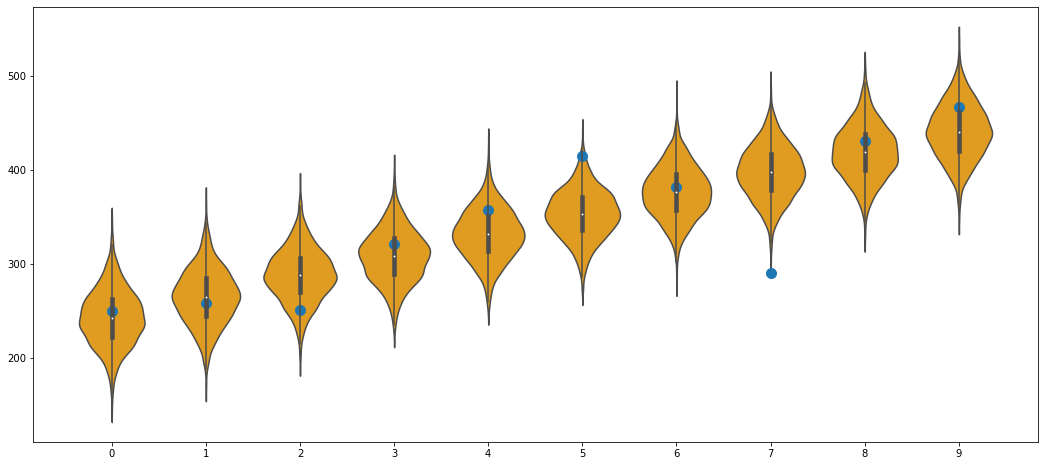

In [26]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive2.iloc[:,0:10],color="orange",alpha=.1)
# plt.xlim([-1,10]);
plt.scatter(df["Days"].iloc[0:10],df["Reaction"].iloc[0:10],s=100)

In [27]:
df_predictive2.iloc[:,0:-1:9]

,0,9,18,27,36,45,54,63,72,81,90,99,108,117,126,135,144,153,162,171
0,221.348404,433.253666,246.868239,282.445644,310.937902,307.160390,292.245885,292.519532,276.779705,263.076046,276.033816,487.560171,290.901720,371.971930,270.702305,368.553967,292.674807,277.752778,280.496889,350.640104
1,258.413680,479.647867,236.739396,228.230304,295.984791,302.726022,294.005879,317.030393,234.883468,307.793491,283.373432,471.571390,271.926775,361.221838,276.661587,329.422782,263.332025,288.959376,240.740170,290.834335
2,288.567813,422.490487,213.809707,257.191777,319.612225,333.073580,297.300195,301.553818,239.664754,231.810743,245.830575,511.998763,319.490291,371.100424,250.030968,323.315774,312.739863,273.836169,275.189358,274.676314
3,283.890856,445.199017,224.260708,219.309550,269.508119,370.562741,341.455671,296.948085,215.581115,262.668222,290.350890,464.209357,279.533002,401.370461,323.116109,365.434542,290.228053,257.434664,277.230596,283.194911
4,263.986215,409.680107,267.257706,201.333204,294.942649,299.010449,326.487260,297.610385,268.206621,281.565483,296.463843,500.943326,323.466014,321.231422,286.393492,335.327485,326.233428,237.289397,316.549128,268.407672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,226.282660,434.575407,231.799141,246.842192,246.578191,290.883729,300.664558,314.631918,231.975686,259.851115,301.855777,438.503573,326.305293,349.609949,296.051838,349.828888,308.394741,292.055677,293.184959,223.828558
1996,258.281744,455.697782,183.353807,190.263747,318.967786,379.320189,279.268834,282.536581,219.274673,291.102847,273.214480,490.457991,332.929112,380.453509,274.412157,328.808764,319.925698,276.326163,241.429999,316.327720
1997,197.016113,429.910705,202.502261,240.220123,331.489253,294.184480,289.686136,380.024646,283.122951,252.158486,327.577578,485.444609,336.468320,345.008464,323.261083,337.609879,276.312284,254.427910,303.122670,283.066146
1998,254.100471,456.429333,209.289761,230.102167,302.191323,327.026908,298.508888,254.295817,225.157136,247.461942,300.434103,413.382526,319.103985,395.569110,249.440583,324.099775,309.090501,238.892008,250.631404,284.554748


In [28]:
my_dict = {i: redo_subject_id(df["Subject"]).count(i) for i in  redo_subject_id(df["Subject"])}

In [29]:
my_dict

{1: 10,
 2: 10,
 3: 10,
 4: 10,
 5: 10,
 6: 10,
 7: 10,
 8: 10,
 9: 10,
 10: 10,
 11: 10,
 12: 10,
 13: 10,
 14: 10,
 15: 10,
 16: 10,
 17: 10,
 18: 10}

In [30]:
df.head(10)

,Unnamed: 0,Reaction,Days,Subject
0,1,249.5600,0,308
1,2,258.7047,1,308
2,3,250.8006,2,308
3,4,321.4398,3,308
4,5,356.8519,4,308
5,6,414.6901,5,308
6,7,382.2038,6,308
7,8,290.1486,7,308
8,9,430.5853,8,308
9,10,466.3535,9,308


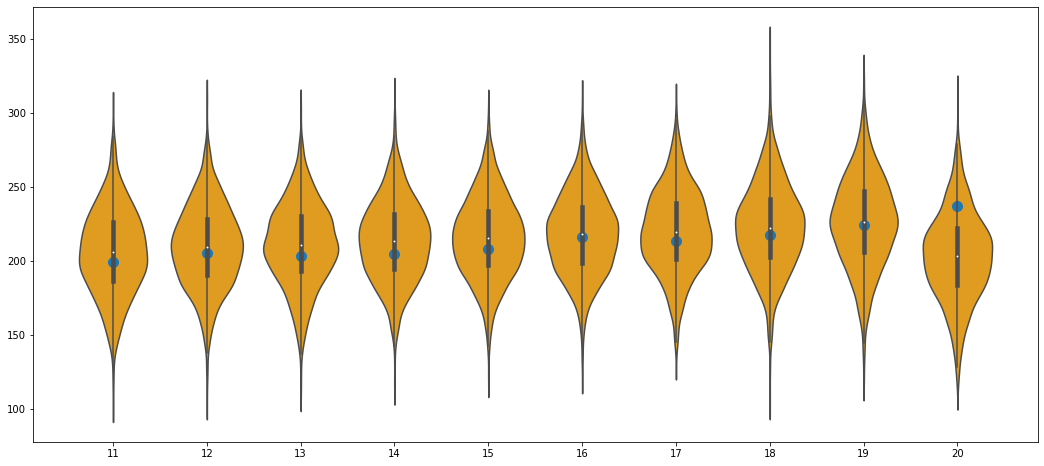

In [41]:
plt.figure(figsize=(18,8))
sns.violinplot(data=df_predictive2.iloc[:,11:21],color="orange",alpha=.1)
plt.scatter(df["Days"].iloc[11:21],df["Reaction"].iloc[11:21],s=100)